# Arbeidskrav 1 - løsningsforslag
Et marked har følgende invers tilbud og etterspørsel:

$p= A + Bx \ (invers \ tilbud)$

$p= a - bx \ (invers \ etterspørsel)$

a) Her er a, b, A, B alle positive tall. Hva viser de?

b) Regn ut markedets likevekt. Finn en betingelse som sikrer at det er positiv omsetning i markedet.

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbols, a,b,A,B,x
a,b,A,B,x,p = sp.symbols('a b A B x p', real=True, positive=True)

# Define the function for supply
supply = sp.Eq(p, A + B*x)

# Define the function for demand
demand = sp.Eq(p, a - b*x)

# Solve for the equilibrium price and quantity
eq = sp.Eq(supply, demand)

solution_eq_x = sp.solve(eq, x)[0]

solution_eq_x

(-A + a)/(B + b)

In [7]:
# solve supply for x
solution_eq_p = supply.subs(x, solution_eq_x)

# remove lhs of the equation since i dont need it
solution_eq_p = solution_eq_p.rhs

solution_eq_p

A + B*(-A + a)/(B + b)

In [8]:
solution_eq_x_num = solution_eq_x.subs([(A, 0), (B, 0.5), (a, 80), (b, 0.5)])

# numerical answer
solution_eq_x_num

80.0000000000000

In [9]:
solution_eq_p_num = solution_eq_p.subs([(A, 0), (B, 0.5), (a, 80), (b, 0.5)])
# numerical answer
solution_eq_p_num

40.0000000000000

c) Regn ut effekten som endringer i a, b, A, B har på likevekten.

In [10]:
for i in [a,b,A,B]:
    display(sp.diff(solution_eq_x, i))


1/(B + b)

-(-A + a)/(B + b)**2

-1/(B + b)

-(-A + a)/(B + b)**2

In [11]:
for i in [a,b,A,B]:
    display(sp.diff(solution_eq_p, i))

B/(B + b)

-B*(-A + a)/(B + b)**2

-B/(B + b) + 1

-B*(-A + a)/(B + b)**2 + (-A + a)/(B + b)

d) Sett inn verdier for a, b, A, B og lag en figur som viser markedslikvekten.

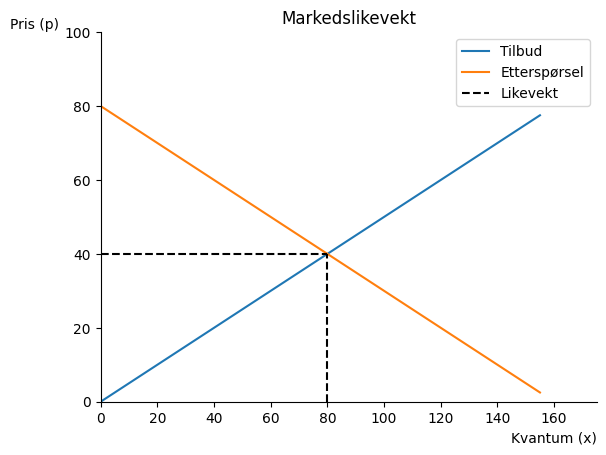

In [12]:
x= np.linspace(0,155,1000)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top', rotation = 0)
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(0,175))
                ax.set(ylim=(0,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

# Defining values for the parameters
a = 80
b = 0.5
A = 0
B = 0.5
# Defining the functions for supply and demand
def supply(x,A,B):
    return A + B*x

def demand(x,a,b):
    return a - b*x

fig, ax = create_ax()

ax.plot(x, supply(x,A,B) ,label='Tilbud')
ax.plot(x, demand(x,a,b) ,label='Etterspørsel')

# Plotting the equilibrium
ax.hlines(solution_eq_p_num, 0, solution_eq_x_num, linestyles='dashed', label='Likevekt', color="black")
ax.vlines(solution_eq_x_num, 0, solution_eq_p_num, linestyles='dashed', color="black")

ax.set_title('Markedslikevekt')

ax.legend(loc='best')
plt.show()

e) Lag 4 figurer som viser viser effektene som du identifiserte i c). Bruk disse figurene til å gi en intuitiv forklaring på dine funn.

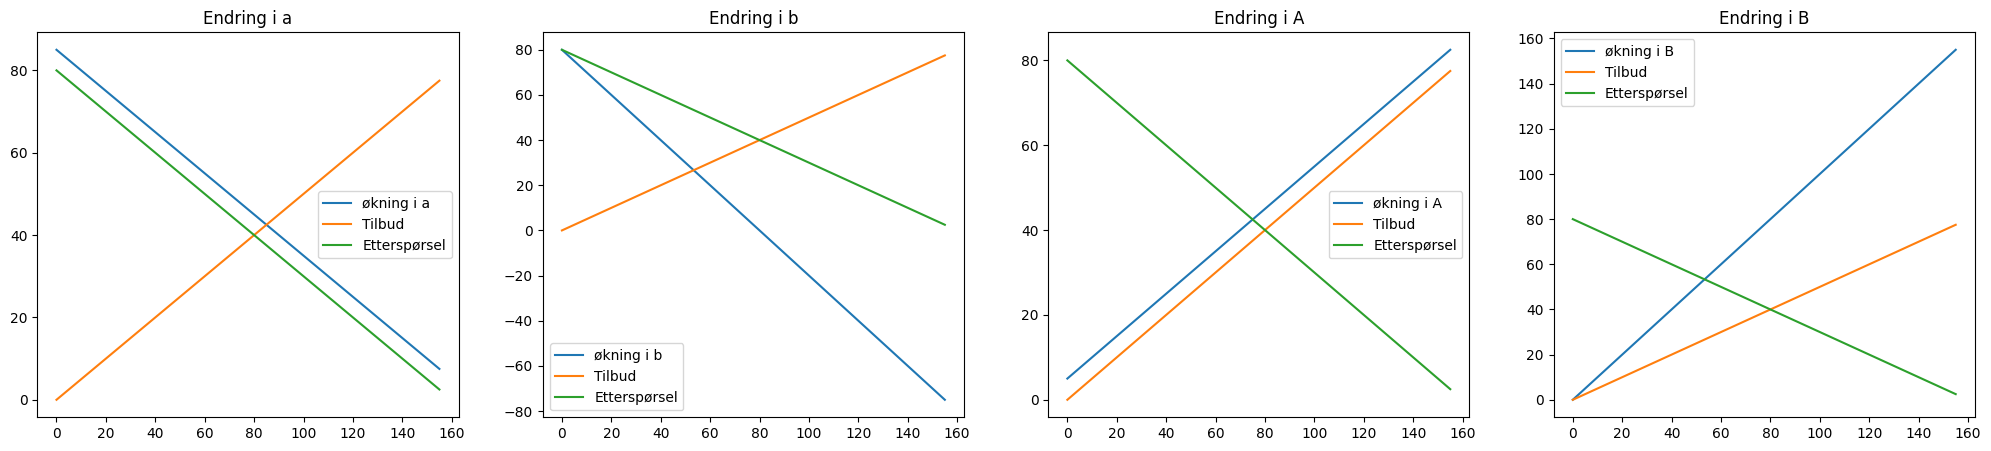

In [13]:
# For loop med endring i a,b,A,B

fig, axs = plt.subplots(1, 4, figsize=(25, 5))

axs[0].plot(x, demand(x,a+5,b), label='økning i a')
axs[1].plot(x, demand(x,a,b+0.5), label='økning i b')
axs[2].plot(x, supply(x,A+5,B), label='økning i A')
axs[3].plot(x, supply(x,A,B+0.5), label='økning i B')

for i in range(4):
    axs[i].plot(x, supply(x,A,B) ,label='Tilbud')
    axs[i].plot(x, demand(x,a,b) ,label='Etterspørsel')
    axs[i].legend(loc='best')

axs[0].set_title('Endring i a')
axs[1].set_title('Endring i b')
axs[2].set_title('Endring i A')
axs[3].set_title('Endring i B')
plt.show()